In [127]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

In [128]:
# load data
teapots = sio.loadmat('teapots.mat')
teapots = teapots['teapotImages']

In [129]:
teapots.shape

(100, 1900)

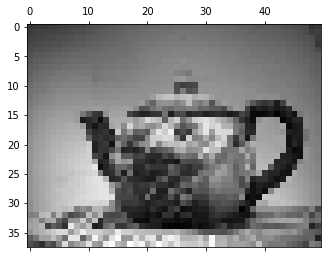

In [132]:
# show sample image
sample_image = teapots[99,:].reshape(50, 38).transpose()
plt.matshow(sample_image, cmap = plt.cm.gray)
plt.show()

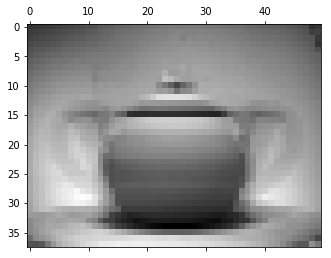

In [120]:
# show mean image
teapots_mean = teapots.mean(axis = 0)
teapots_mean_image = teapots_mean.reshape(50, 38).transpose()
plt.matshow(teapots_mean_image, cmap = plt.cm.gray)
plt.show()

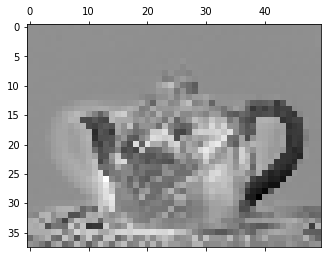

In [121]:
#center data and display sample centered data
teapots_center = teapots - teapots_mean
sample_center = teapots_center[0,:]
sample_center_image = sample_center.reshape(50, 38).transpose()
plt.matshow(sample_center_image, cmap = plt.cm.gray)
plt.show()

In [122]:
# convariance matrix
C = teapots_center.transpose().dot(teapots_center)
# eigen value and vector
v, w = np.linalg.eig(C)

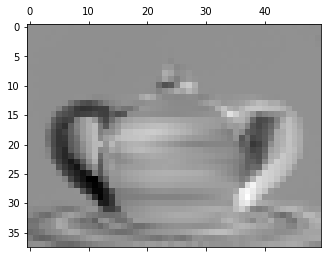

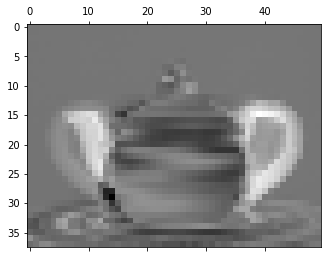

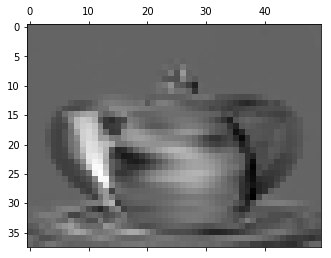

In [123]:
# show largest 3 eigenvector
eig1 = w[:,0]
eig1_image = eig1.reshape(50, 38).transpose().real
plt.matshow(eig1_image, cmap = plt.cm.gray)
plt.show()

eig2 = w[:,1]
eig2_image = eig2.reshape(50, 38).transpose().real
plt.matshow(eig2_image, cmap = plt.cm.gray)
plt.show()

eig3 = w[:,2]
eig3_image = eig3.reshape(50, 38).transpose().real
plt.matshow(eig3_image, cmap = plt.cm.gray)
plt.show()

In [124]:
# least square solution
X = np.zeros((eig1.shape[0], 4))
X[:,0] = teapots_mean
X[:,1] = eig1.real
X[:,2] = eig2.real
X[:,3] = eig3.real

w_opt = inv(X.transpose().dot(X)).dot(X.transpose()).dot(teapots.transpose())

In [125]:
# reconstructed images
recon = X.dot(w_opt)

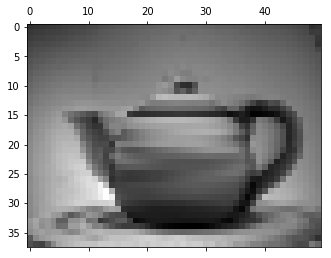

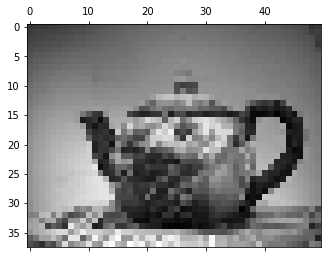

In [126]:
sample_num = 99
sample_recon_img = recon[:,sample_num].reshape(50, 38).transpose()
sample_img = teapots[sample_num,:].reshape(50, 38).transpose()
plt.matshow(sample_recon_img, cmap = plt.cm.gray)
plt.show()
plt.matshow(sample_img, cmap = plt.cm.gray)
plt.show()